In [1]:
import pandas as pd
import numpy as np
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_pizza = pd.read_csv('pizzas.csv')
df_orders = pd.read_csv('order_details.csv')
df_orders_2 = pd.read_csv('orders.csv')
#df_pizza_types = pd.read_csv('pizza_types.csv')

In [3]:
df_pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [4]:
df_pizza.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [5]:
df_orders.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
df_orders.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [7]:
df_orders_2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [8]:
df_orders_2.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [9]:
df_pizza_types = pd.read_csv('pizza_types.csv',  encoding='latin1')

In [10]:
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [11]:
df_pizza_types.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

# Merging the datasets

In [12]:
merged_df1 = df_pizza.merge(df_pizza_types, on='pizza_type_id')
merged_df1

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [13]:
merged_df2 = df_orders.merge(df_orders_2, on='order_id')

In [14]:
merged_df2

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [15]:
df_merged = merged_df2.merge(merged_df1, on='pizza_id')

In [16]:
df_merged

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [17]:
df_dictionary = pd.read_csv('data_dictionary.csv')

In [18]:
df_dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


In [16]:
df_merged['pizza_type_id'].unique()

array(['hawaiian', 'classic_dlx', 'five_cheese', 'ital_supr', 'mexicana',
       'thai_ckn', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'green_garden', 'ital_cpcllo', 'spicy_ital', 'spin_pesto',
       'veggie_veg', 'southw_ckn', 'cali_ckn', 'pepperoni', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'calabrese', 'ital_veggie', 'mediterraneo', 'peppr_salami',
       'spinach_fet', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [17]:
df_merged.describe(include='O')

,pizza_id,date,time,pizza_type_id,size,name,category,ingredients
count,48620,48620,48620,48620,48620,48620,48620,48620
unique,91,358,16382,32,5,32,4,32
top,big_meat_s,2015-11-26,12:32:00,classic_dlx,L,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
freq,1811,261,26,2416,18526,2416,14579,2416


In [18]:
df_merged['date'].unique()

array(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
       '2015-01-06', '2015-01-07', '2015-01-09', '2015-01-10',
       '2015-01-14', '2015-01-17', '2015-01-19', '2015-01-21',
       '2015-01-22', '2015-01-23', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
       '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06',
       '2015-02-08', '2015-02-10', '2015-02-11', '2015-02-12',
       '2015-02-13', '2015-02-14', '2015-02-16', '2015-02-17',
       '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
       '2015-02-23', '2015-02-24', '2015-02-26', '2015-02-27',
       '2015-02-28', '2015-03-02', '2015-03-03', '2015-03-04',
       '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-08',
       '2015-03-10', '2015-03-12', '2015-03-13', '2015-03-14',
       '2015-03-15', '2015-03-17', '2015-03-18', '2015-03-20',
       '2015-03-21', '2015-03-22', '2015-03-23', '2015-03-26',
       '2015-03-27', '2015-03-28', '2015-03-30', '2015-

In [22]:
df_merged.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [23]:
df_merged.kurtosis()

/var/folders/mc/wtr2th093fscq0l5wyyg1yg00000gq/T/ipykernel_33009/3157826154.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged.kurtosis()


order_details_id    -1.200000
order_id            -1.210753
quantity            65.422674
price               -0.582589
dtype: float64

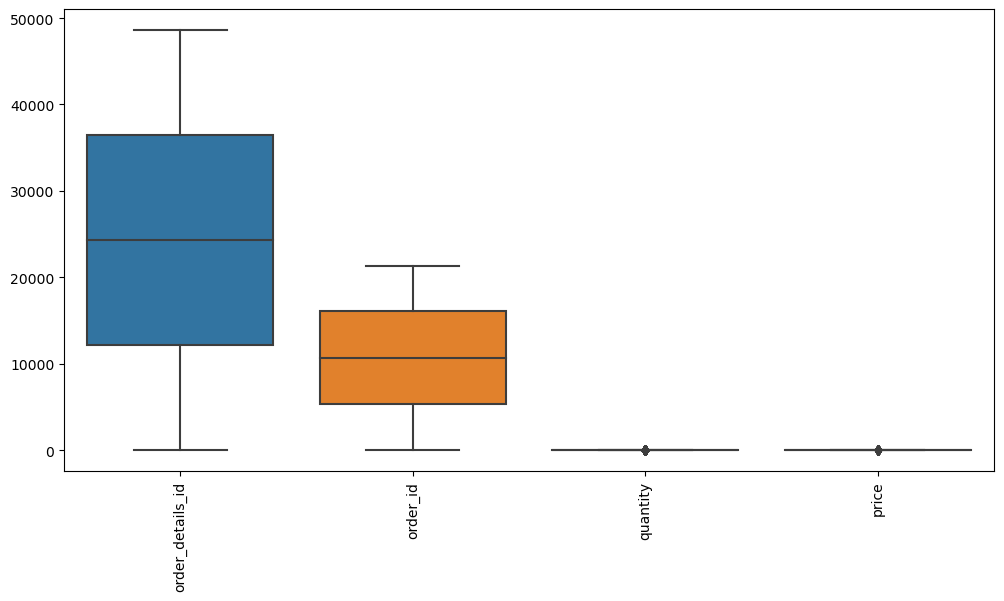

In [24]:
# Create box plots for each numeric column in your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged)
plt.xticks(rotation=90)
plt.show()

In [25]:
df_merged.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [26]:
df_merged.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')

# Feature Engineering

In [19]:
df_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [20]:
df_merged.dtypes

order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
date                 object
time                 object
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
dtype: object

In [21]:

# Convert the 'date' column to a datetime data type
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Extract day of the week, month, and quarter
df_merged['day_of_week'] = df_merged['date'].dt.day_name()  # Day of the week (e.g., Monday)
df_merged['month'] = df_merged['date'].dt.month  # Month as an integer (1-12)
df_merged['quarter'] = df_merged['date'].dt.quarter  # Quarter as an integer (1-4)

# Display the updated DataFrame
df_merged[['date', 'day_of_week', 'month', 'quarter']]

,date,day_of_week,month,quarter
0,2015-01-01,Thursday,1,1
1,2015-01-02,Friday,1,1
2,2015-01-03,Saturday,1,1
3,2015-01-03,Saturday,1,1
4,2015-01-04,Sunday,1,1
...,...,...,...,...
48615,2015-10-24,Saturday,10,4
48616,2015-11-05,Thursday,11,4
48617,2015-11-17,Tuesday,11,4
48618,2015-11-19,Thursday,11,4


In [22]:
df_merged[['date', 'day_of_week', 'month', 'quarter']]

,date,day_of_week,month,quarter
0,2015-01-01,Thursday,1,1
1,2015-01-02,Friday,1,1
2,2015-01-03,Saturday,1,1
3,2015-01-03,Saturday,1,1
4,2015-01-04,Sunday,1,1
...,...,...,...,...
48615,2015-10-24,Saturday,10,4
48616,2015-11-05,Thursday,11,4
48617,2015-11-17,Tuesday,11,4
48618,2015-11-19,Thursday,11,4


In [23]:
df_merged

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Saturday,10,4
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Thursday,11,4
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Tuesday,11,4
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Thursday,11,4


In [24]:

# Define a function to map dates to seasons
def get_season(date):
    if (date.month == 3 and date.day >= 20) or (date.month > 3 and date.month < 6) or (date.month == 6 and date.day < 21):
        return 'Spring'
    elif (date.month == 6 and date.day >= 21) or (date.month > 6 and date.month < 9) or (date.month == 9 and date.day < 23):
        return 'Summer'
    elif (date.month == 9 and date.day >= 23) or (date.month > 9 and date.month < 12) or (date.month == 12 and date.day < 21):
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to create the 'season' column
df_merged['season'] = df_merged['date'].apply(get_season)
df_merged.head()


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1,Winter


In [25]:
df_merged['time'] = pd.to_datetime(df_merged['time'])

# Extract time-related features
df_merged['hour_of_day'] = df_merged['time'].dt.hour  # Hour of the day (0-23)
df_merged['minute_of_hour'] = df_merged['time'].dt.minute  # Minute of the hour (0-59)


In [26]:
df_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22
2,357,146,hawaiian_m,1,2015-01-03,2023-10-12 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,14,22
3,389,163,hawaiian_m,1,2015-01-03,2023-10-12 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,16,54
4,568,247,hawaiian_m,1,2015-01-04,2023-10-12 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1,Winter,20,55


In [27]:
df_merged['quantity'].unique()

array([1, 2, 3, 4])

In [28]:
df_merged['category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [29]:
df_merged[df_merged['quantity']== 2]

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour
42,5800,2570,hawaiian_m,2,2015-02-12,2023-10-12 15:54:49,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,2,1,Winter,15,54
76,8794,3858,hawaiian_m,2,2015-03-06,2023-10-12 18:42:52,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,3,1,Winter,18,42
81,9074,3978,hawaiian_m,2,2015-03-08,2023-10-12 17:55:21,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,3,1,Winter,17,55
82,9260,4057,hawaiian_m,2,2015-03-10,2023-10-12 11:28:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Tuesday,3,1,Winter,11,28
139,14955,6554,hawaiian_m,2,2015-04-20,2023-10-12 18:43:08,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Monday,4,2,Spring,18,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47119,38036,16786,brie_carre_s,2,2015-10-11,2023-10-12 12:30:56,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",Sunday,10,4,Fall,12,30
47204,46716,20514,brie_carre_s,2,2015-12-15,2023-10-12 12:14:37,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",Tuesday,12,4,Fall,12,14
47221,457,193,ckn_alfredo_l,2,2015-01-03,2023-10-12 20:55:47,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",Saturday,1,1,Winter,20,55
48326,1800,800,calabrese_l,2,2015-01-14,2023-10-12 12:54:35,calabrese,L,20.25,The Calabrese Pizza,Supreme,"Nduja Salami, Pancetta, Tomatoes, Red Onions,...",Wednesday,1,1,Winter,12,54


In [30]:
df_merged.dtypes

order_details_id             int64
order_id                     int64
pizza_id                    object
quantity                     int64
date                datetime64[ns]
time                datetime64[ns]
pizza_type_id               object
size                        object
price                      float64
name                        object
category                    object
ingredients                 object
day_of_week                 object
month                        int64
quarter                      int64
season                      object
hour_of_day                  int64
minute_of_hour               int64
dtype: object

In [39]:
df_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22
2,357,146,hawaiian_m,1,2015-01-03,2023-10-12 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,14,22
3,389,163,hawaiian_m,1,2015-01-03,2023-10-12 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,16,54
4,568,247,hawaiian_m,1,2015-01-04,2023-10-12 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1,Winter,20,55


In [31]:

# Assuming you have a DataFrame named 'df_merged' with 'quantity' and 'price' columns
df_merged['revenue'] = df_merged['quantity'] * df_merged['price']

# Display the updated DataFrame with the 'revenue' column
df_merged.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22,13.25
2,357,146,hawaiian_m,1,2015-01-03,2023-10-12 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,14,22,13.25
3,389,163,hawaiian_m,1,2015-01-03,2023-10-12 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,16,54,13.25
4,568,247,hawaiian_m,1,2015-01-04,2023-10-12 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1,Winter,20,55,13.25


In [41]:
df_merged

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22,13.25
2,357,146,hawaiian_m,1,2015-01-03,2023-10-12 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,14,22,13.25
3,389,163,hawaiian_m,1,2015-01-03,2023-10-12 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,16,54,13.25
4,568,247,hawaiian_m,1,2015-01-04,2023-10-12 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,1,1,Winter,20,55,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,2023-10-12 18:58:20,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Saturday,10,4,Fall,18,58,35.95
48616,41183,18139,the_greek_xxl,1,2015-11-05,2023-10-12 20:28:52,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Thursday,11,4,Fall,20,28,35.95
48617,42718,18789,the_greek_xxl,1,2015-11-17,2023-10-12 11:23:51,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Tuesday,11,4,Fall,11,23,35.95
48618,43041,18919,the_greek_xxl,1,2015-11-19,2023-10-12 16:58:26,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Thursday,11,4,Fall,16,58,35.95


In [32]:
df_merged.to_csv('pizza_data_analysis.csv')

In [43]:
import pandas as pd

# Read the CSV file into a DataFrame
#df = pd.read_csv('pizza_data_analysis.csv')

# Iterate through column combinations to find a primary key
for column_combination in df_merged.columns:
    # Check if the combination is unique
    if df_merged.duplicated(subset=column_combination).sum() == 0:
        print("Primary Key Found:", column_combination)
        break


Primary Key Found: order_details_id


In [44]:
df_merged.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'day_of_week', 'month', 'quarter', 'season', 'hour_of_day',
       'minute_of_hour', 'revenue'],
      dtype='object')

In [33]:
df_merged['name'].value_counts()                                                                  

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [34]:
df_merged.head(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22,13.25


---
# Exploratory Data Analysis

# Weekday Vs. Orders Received on that given weekday

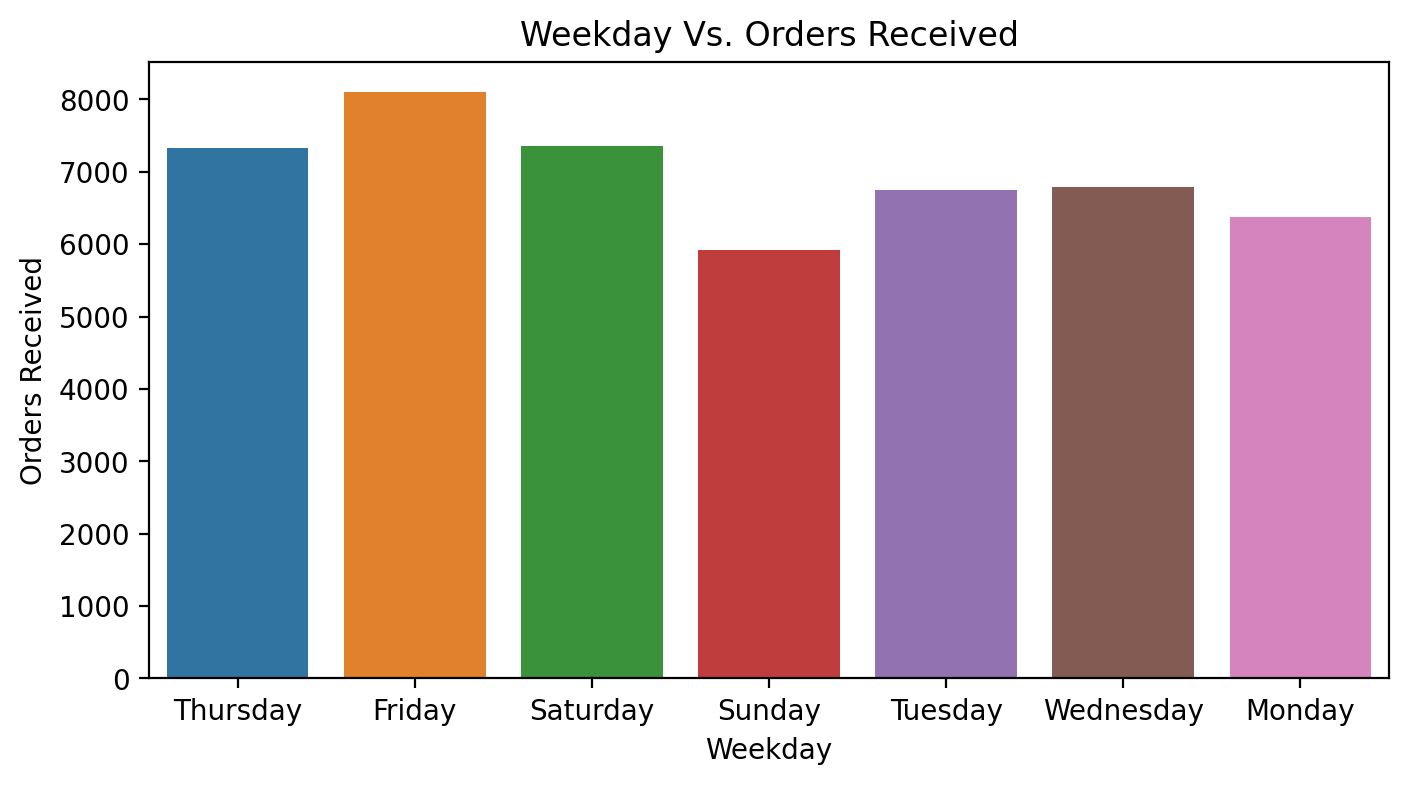

In [47]:

plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df_merged, x='day_of_week')
plt.xlabel("Weekday")
plt.ylabel("Orders Received")
plt.title("Weekday Vs. Orders Received")
plt.show();

# Hour Vs. Orders Received on that given weekday

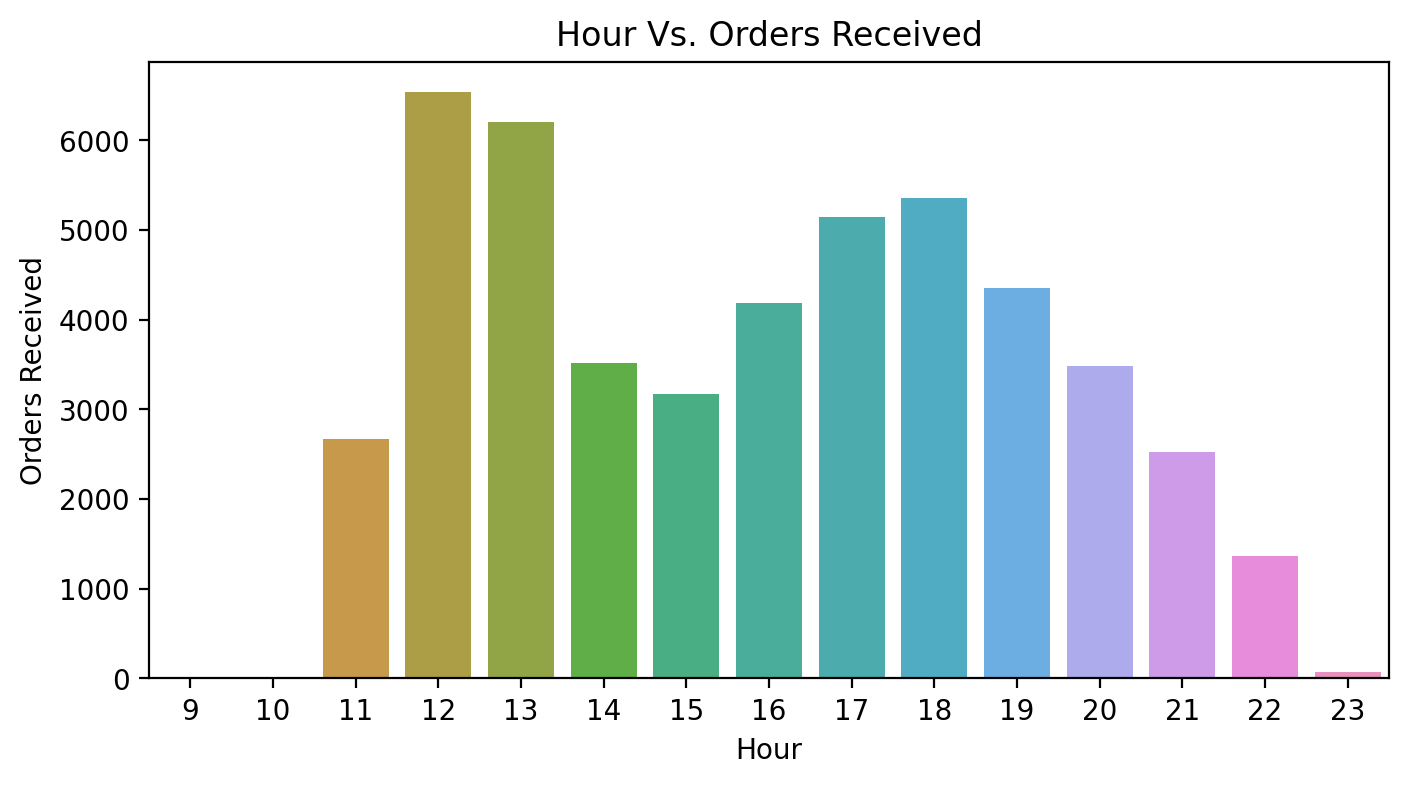

In [48]:


plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df_merged, x='hour_of_day')
plt.xlabel("Hour")
plt.ylabel("Orders Received")
plt.title("Hour Vs. Orders Received")
plt.show();

# Hour_Minute Vs. Orders Received on that given weekday for Top 30 Hours interms Orders Received

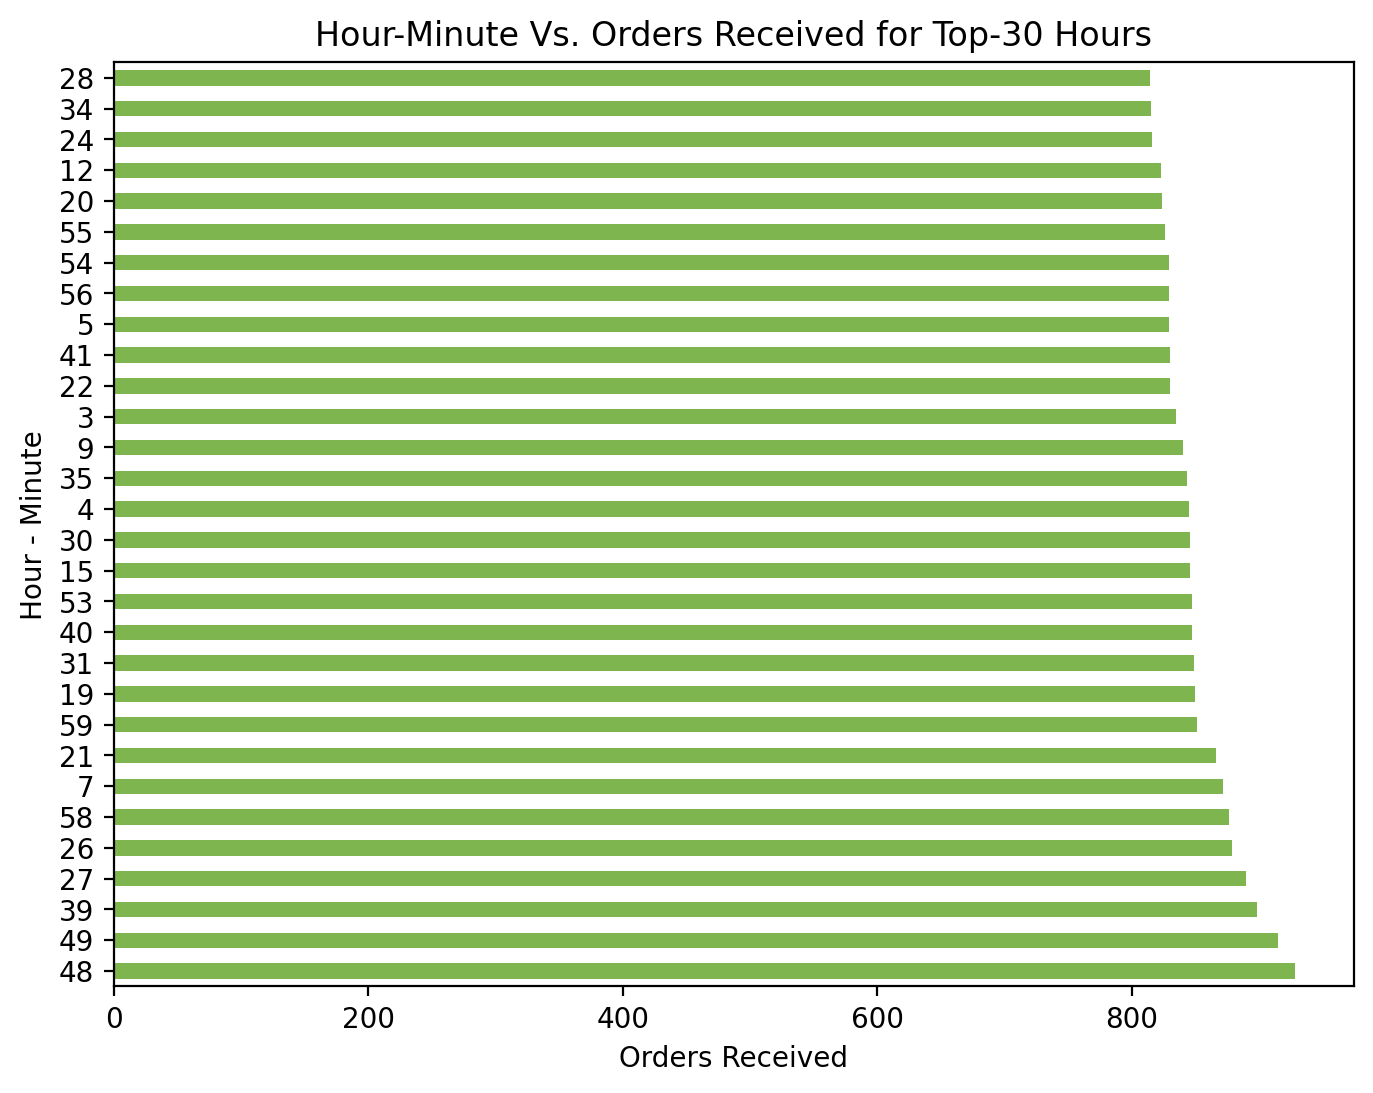

In [49]:
# Hour_Minute Vs. Orders Received on that given weekday for Top 30 Hours interms Orders Received
plt.figure(figsize=(8,6),dpi=200)
df_merged['minute_of_hour'].value_counts()[:30].plot(kind='barh',color='#7eb54e')
plt.xlabel("Orders Received")
plt.ylabel("Hour - Minute")
plt.title("Hour-Minute Vs. Orders Received for Top-30 Hours")
plt.show();

In [50]:
df_merged.head(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25


# Hours where 'Count of sales' > 4000 

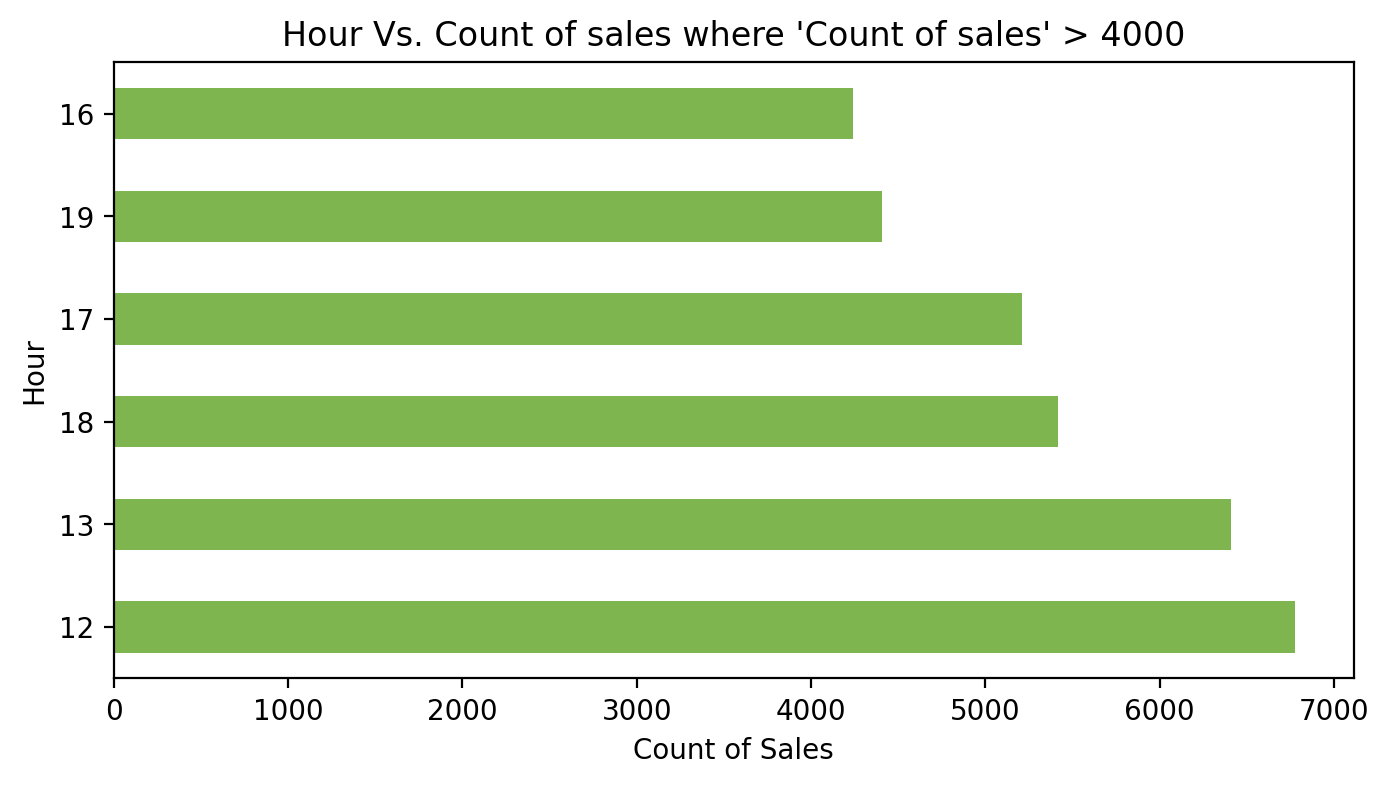

In [51]:
# Hours where 'Count of sales' > 4000 (Peak Periods)

plt.figure(figsize=(8,4),dpi=200)
df_merged.groupby(['hour_of_day'])['quantity'].sum().sort_values(ascending=False)[:6].plot(kind='barh',color='#7eb54e')
plt.xlabel("Count of Sales")
plt.ylabel("Hour")
plt.title("Hour Vs. Count of sales where 'Count of sales' > 4000")
plt.show()

In [52]:
df_merged.head(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25


# pizza Size Vs. Count of sales

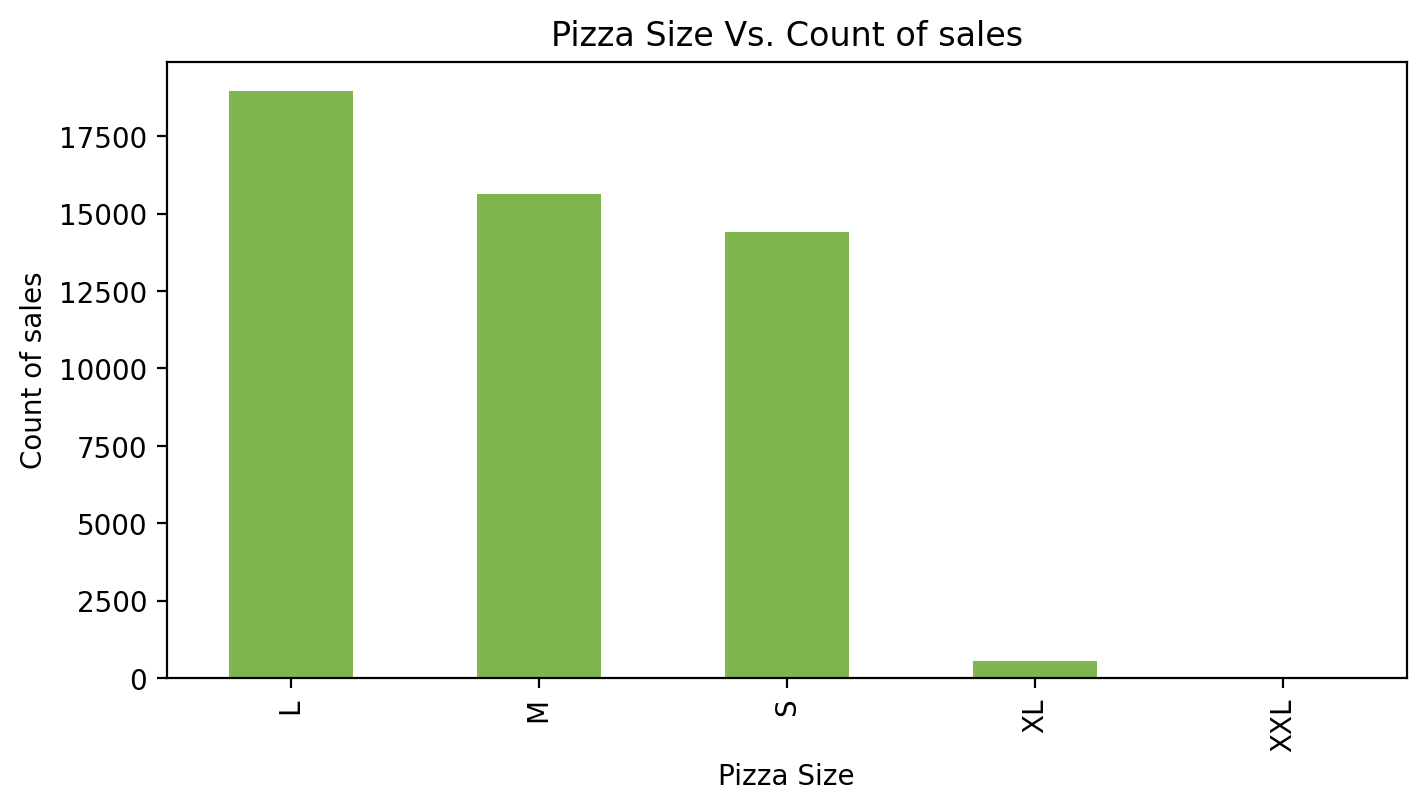

In [53]:
plt.figure(figsize=(8,4),dpi=200)
df_merged.groupby(['size'])['quantity'].sum().sort_values(ascending=False).plot(kind='bar',color='#7eb54e')
plt.xlabel("Pizza Size")
plt.ylabel("Count of sales")
plt.title("Pizza Size Vs. Count of sales")
plt.show();

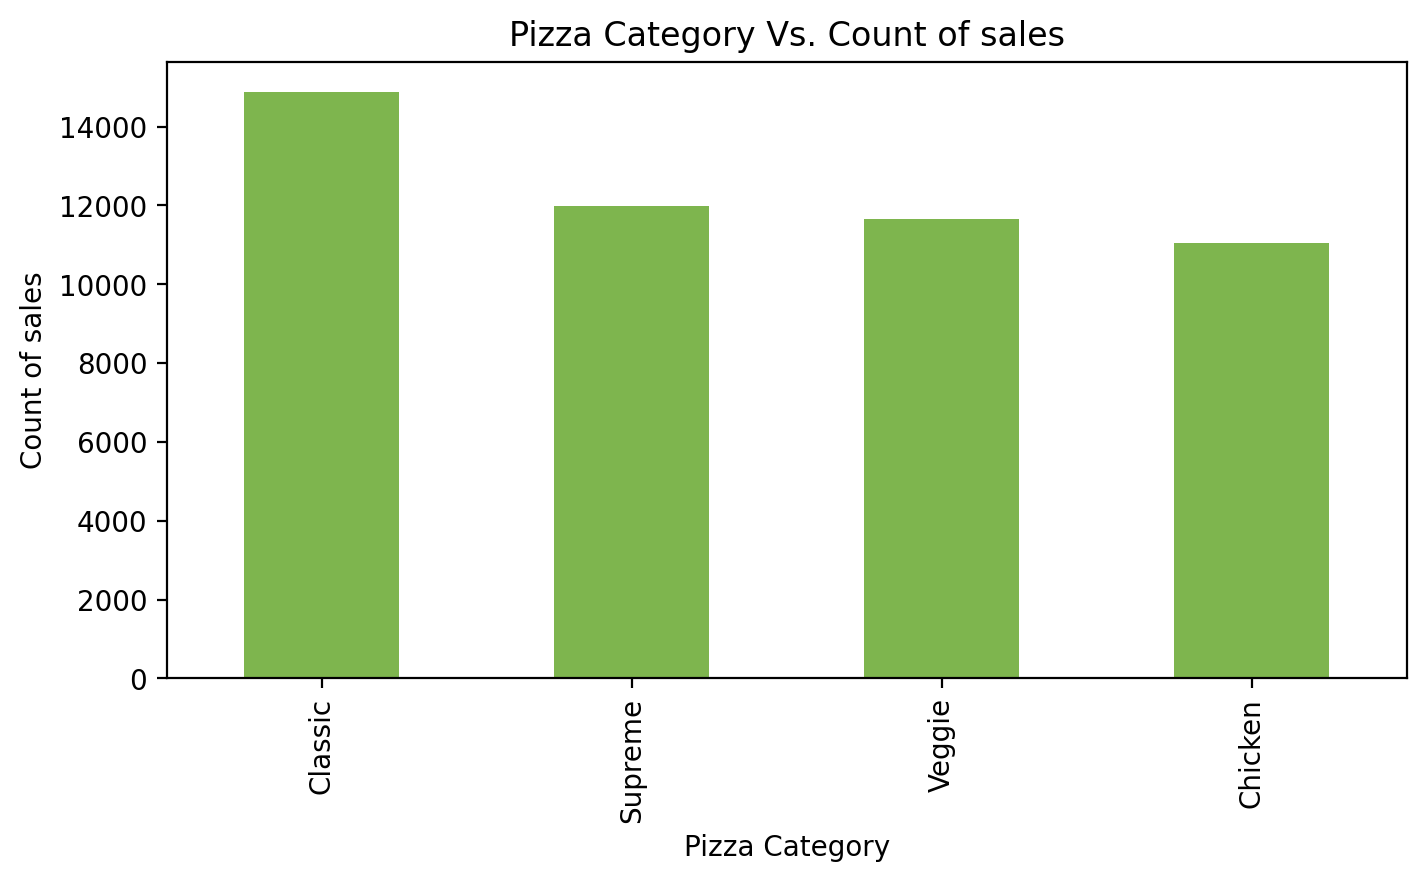

In [54]:
plt.figure(figsize=(8,4),dpi=200)
df_merged.groupby(['category'])['quantity'].sum().sort_values(ascending=False).plot(kind='bar',color='#7eb54e')
plt.xlabel("Pizza Category")
plt.ylabel("Count of sales")
plt.title("Pizza Category Vs. Count of sales")
plt.show();

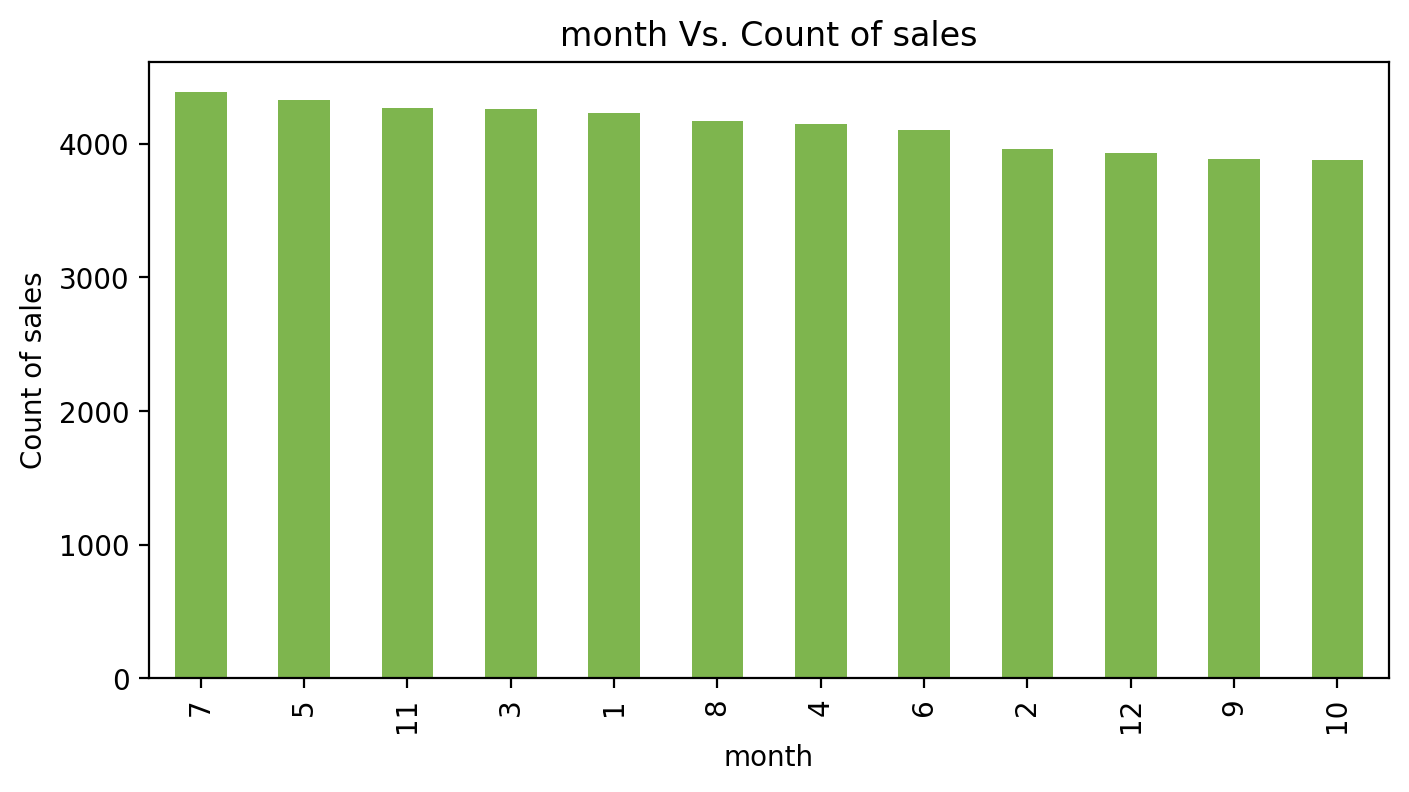

In [55]:
plt.figure(figsize=(8,4),dpi=200)
df_merged.groupby(['month'])['quantity'].sum().sort_values(ascending=False).plot(kind='bar',color='#7eb54e')
plt.xlabel("month")
plt.ylabel("Count of sales")
plt.title("month Vs. Count of sales")
plt.show();


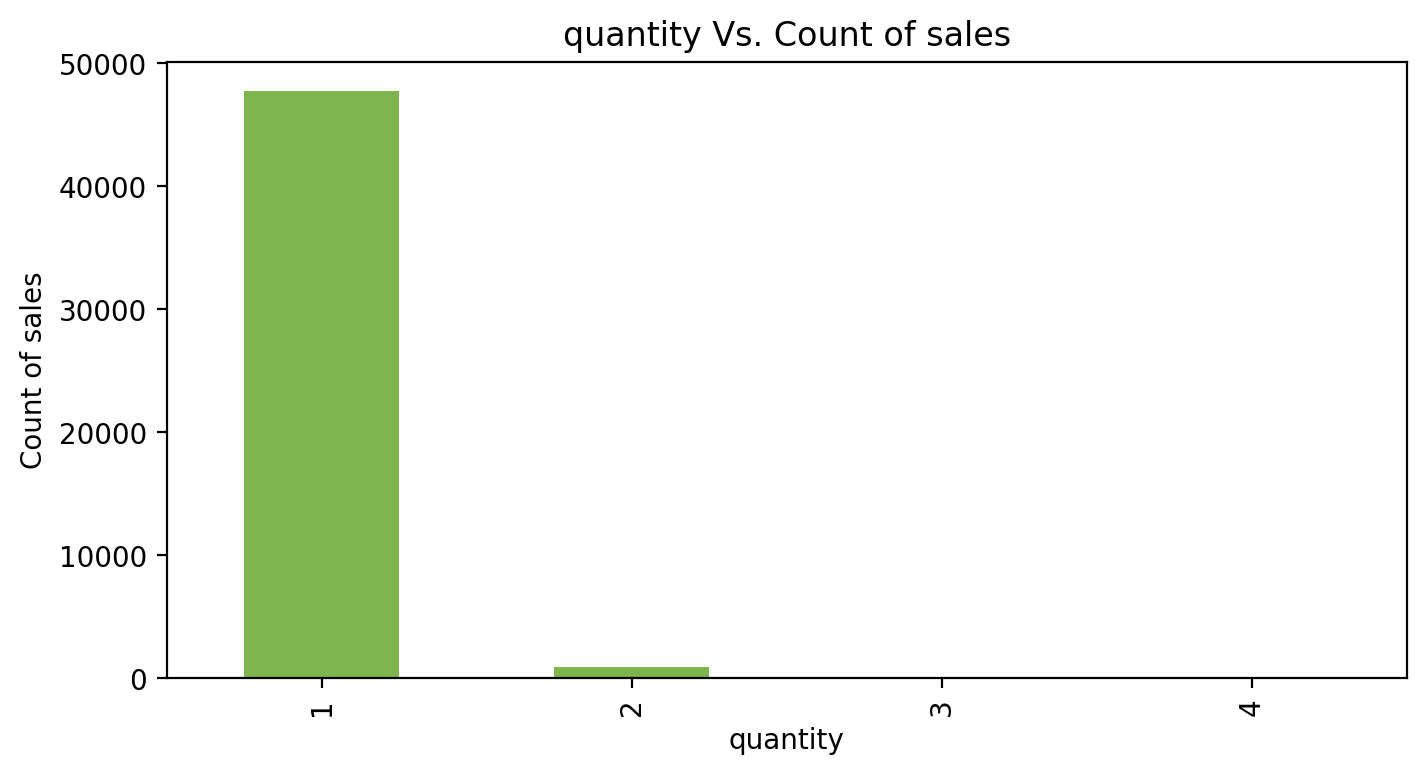

In [56]:
plt.figure(figsize=(8,4),dpi=200)
df_merged['quantity'].value_counts().plot(kind='bar',color='#7eb54e')
plt.xlabel("quantity")
plt.ylabel("Count of sales")
plt.title("quantity Vs. Count of sales")
plt.show();

In [57]:
df_merged.head(1)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25


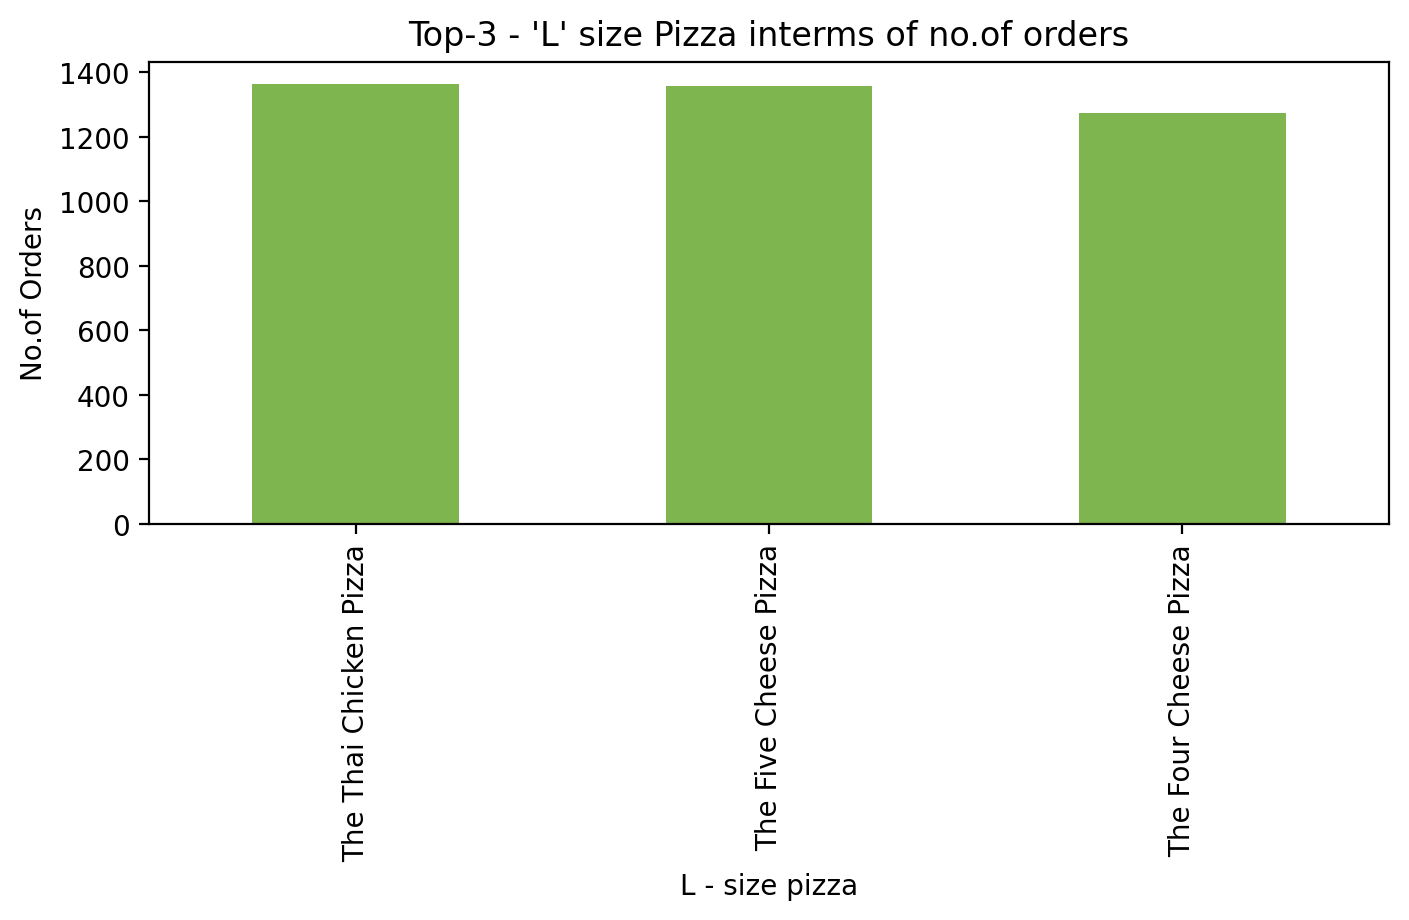

In [58]:
# Top-3 - 'L' size Pizza interms of no.of orders

plt.figure(figsize=(8,3),dpi=200)
df_merged[df_merged['size']=='L']['name'].value_counts()[:3].plot(kind='bar',color='#7eb54e')
plt.xlabel("L - size pizza")
plt.ylabel("No.of Orders")
plt.title("Top-3 - 'L' size Pizza interms of no.of orders")
plt.show();

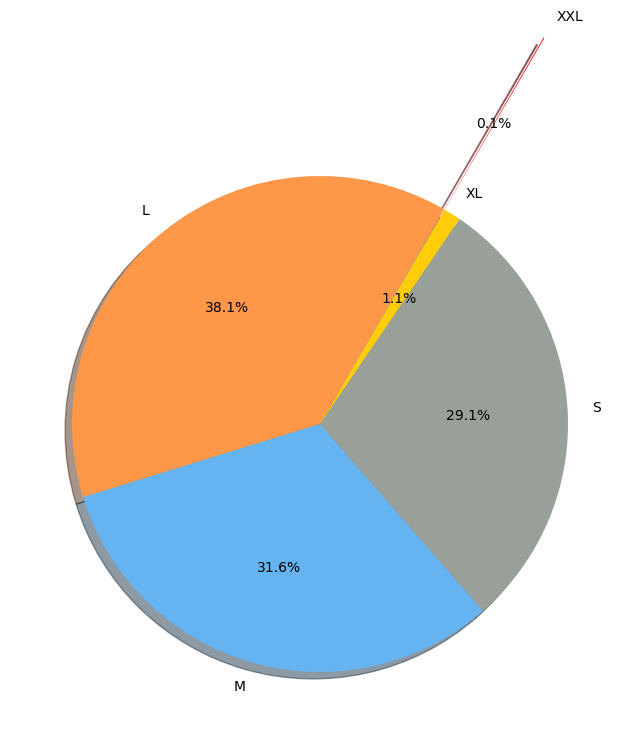

In [59]:
labels = df_merged["size"].value_counts().index
sizes = df_merged["size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

In [60]:
df_merged.head(4)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,quarter,season,hour_of_day,minute_of_hour,revenue
0,1,1,hawaiian_m,1,2015-01-01,2023-10-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,1,1,Winter,11,38,13.25
1,179,77,hawaiian_m,1,2015-01-02,2023-10-12 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,1,1,Winter,12,22,13.25
2,357,146,hawaiian_m,1,2015-01-03,2023-10-12 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,14,22,13.25
3,389,163,hawaiian_m,1,2015-01-03,2023-10-12 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,1,1,Winter,16,54,13.25


---

In [61]:
df_merged.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'day_of_week', 'month', 'quarter', 'season', 'hour_of_day',
       'minute_of_hour', 'revenue'],
      dtype='object')

In [35]:
import pandas as pd

# Assuming you have a DataFrame named 'df_merged' with 'date', 'category', 'price', and 'quantity' columns
# Convert the 'date' column to a datetime data type
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Calculate the monetary value by multiplying quantity and price for each order
#df_merged['monetary'] = df_merged['quantity'] * df_merged['price']

# Group data by category and calculate recency, frequency, and monetary values
rfm_data = df_merged.groupby('pizza_id').agg({
    'date': 'max',         # Recency: Use the latest date in each category
    'price': 'sum',
    'quantity': 'sum' #Monetary: Sum of monetary values in each category
}).reset_index()

# # Calculate recency by finding the difference between the latest date and each category's date
# latest_date = df_merged['date'].max()
# rfm_data['recency'] = (latest_date - rfm_data['date']).dt.days

# Calculate frequency by counting the number of orders for each category
rfm_data['frequency'] = df_merged.groupby('pizza_id')['date'].count().values

# Drop the 'date' column as it's no longer needed
rfm_data.drop(columns=['date'], inplace=True)






In [36]:
rfm_data.head()

,pizza_id,price,quantity,frequency
0,bbq_ckn_l,20065.25,992,967
1,bbq_ckn_m,15510.50,956,926
2,bbq_ckn_s,6107.25,484,479
3,big_meat_s,21732.00,1914,1811
4,brie_carre_s,11352.00,490,480


In [39]:
# Convert 'pizza_id' to string
rfm_data['pizza_id'] = rfm_data['pizza_id'].astype(str)

# Extract the size from the 'pizza_id' column
rfm_data['size'] = rfm_data['pizza_id'].str.split('_').str[-1]

In [40]:
rfm_data

,pizza_id,price,quantity,frequency,size
0,bbq_ckn_l,20065.25,992,967,l
1,bbq_ckn_m,15510.50,956,926,m
2,bbq_ckn_s,6107.25,484,479,s
3,big_meat_s,21732.00,1914,1811,s
4,brie_carre_s,11352.00,490,480,s
...,...,...,...,...,...
86,the_greek_xl,13872.00,552,544,xl
87,the_greek_xxl,1006.60,28,28,xxl
88,veggie_veg_l,8565.75,427,423,l
89,veggie_veg_m,10080.00,635,630,m


In [41]:
rfm_data.describe()

,price,quantity,frequency
count,91.000000,91.000000,91.000000
mean,8812.579121,544.769231,534.285714
std,5743.642409,327.979440,315.179289
min,1006.600000,28.000000,28.000000
25%,4862.500000,303.000000,300.000000
50%,7116.000000,464.000000,457.000000
75%,11105.000000,699.500000,688.500000
max,28323.750000,1914.000000,1811.000000


In [42]:
# rename the features
rfm_data.rename(columns={'quantity': 'quantity',
                            'frequency': 'frequency',
                            'price': 'monetary'}, inplace=True)

In [43]:
rfm_data.head()

,pizza_id,monetary,quantity,frequency,size
0,bbq_ckn_l,20065.25,992,967,l
1,bbq_ckn_m,15510.50,956,926,m
2,bbq_ckn_s,6107.25,484,479,s
3,big_meat_s,21732.00,1914,1811,s
4,brie_carre_s,11352.00,490,480,s


In [44]:
rfm=rfm_data.copy()

In [45]:
rfm

,pizza_id,monetary,quantity,frequency,size
0,bbq_ckn_l,20065.25,992,967,l
1,bbq_ckn_m,15510.50,956,926,m
2,bbq_ckn_s,6107.25,484,479,s
3,big_meat_s,21732.00,1914,1811,s
4,brie_carre_s,11352.00,490,480,s
...,...,...,...,...,...
86,the_greek_xl,13872.00,552,544,xl
87,the_greek_xxl,1006.60,28,28,xxl
88,veggie_veg_l,8565.75,427,423,l
89,veggie_veg_m,10080.00,635,630,m


In [46]:
rfm_data.shape

(91, 5)

In [47]:
rfm_data.describe()

,monetary,quantity,frequency
count,91.000000,91.000000,91.000000
mean,8812.579121,544.769231,534.285714
std,5743.642409,327.979440,315.179289
min,1006.600000,28.000000,28.000000
25%,4862.500000,303.000000,300.000000
50%,7116.000000,464.000000,457.000000
75%,11105.000000,699.500000,688.500000
max,28323.750000,1914.000000,1811.000000


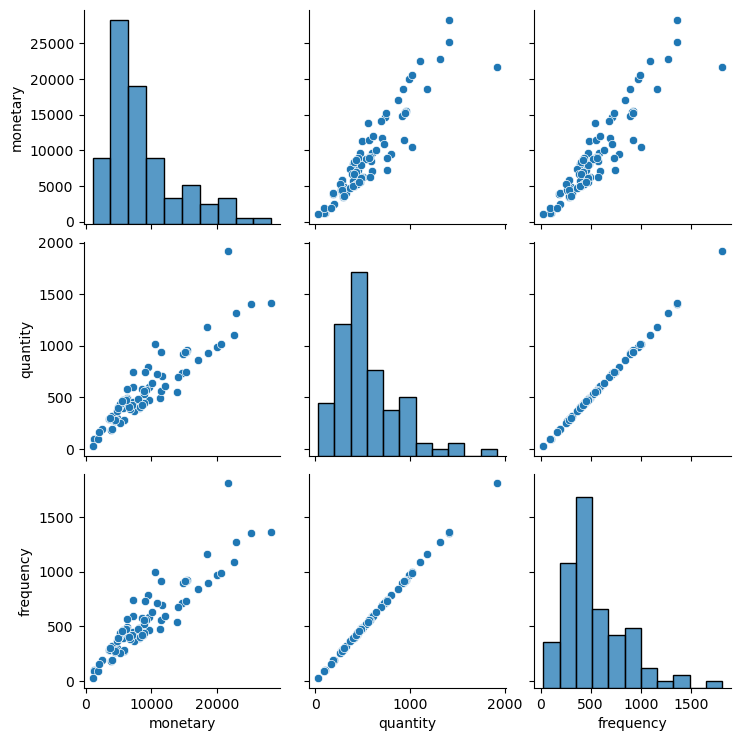

In [48]:
sns.pairplot(rfm_data)

# Preprocessing data

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
# Assuming you have a DataFrame named df and you want to label encode the 'categorical_column' column
categorical_column = 'pizza_id'

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

rfm_data[categorical_column] = label_encoder.fit_transform(rfm_data[categorical_column])


In [51]:
rfm_data

,pizza_id,monetary,quantity,frequency,size
0,0,20065.25,992,967,l
1,1,15510.50,956,926,m
2,2,6107.25,484,479,s
3,3,21732.00,1914,1811,s
4,4,11352.00,490,480,s
...,...,...,...,...,...
86,86,13872.00,552,544,xl
87,87,1006.60,28,28,xxl
88,88,8565.75,427,423,l
89,89,10080.00,635,630,m


In [52]:
rfm_data

,pizza_id,monetary,quantity,frequency,size
0,0,20065.25,992,967,l
1,1,15510.50,956,926,m
2,2,6107.25,484,479,s
3,3,21732.00,1914,1811,s
4,4,11352.00,490,480,s
...,...,...,...,...,...
86,86,13872.00,552,544,xl
87,87,1006.60,28,28,xxl
88,88,8565.75,427,423,l
89,89,10080.00,635,630,m


In [54]:
# Assuming you have a DataFrame named df and you want to label encode the 'categorical_column' column
categorical_columns = 'size'

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

rfm_data[categorical_columns] = label_encoder.fit_transform(rfm_data[categorical_columns])

In [55]:
# We choose to use minmaxscaler because we are mostly looking to normalize the data and not looking for a mean equal to zero.
scaler = MinMaxScaler()

norm = scaler.fit_transform(rfm_data)

print(norm)

[[0.         0.69768076 0.51113468 0.52664049 0.        ]
 [0.01111111 0.53094485 0.49204666 0.50364554 0.25      ]
 [0.02222222 0.1867197  0.24178155 0.25294448 0.5       ]
 [0.03333333 0.75869554 1.         1.         0.5       ]
 [0.04444444 0.37871447 0.24496288 0.25350533 0.5       ]
 [0.05555556 0.16626551 0.13149523 0.13796971 0.        ]
 [0.06666667 0.29270623 0.28313892 0.29500841 0.25      ]
 [0.07777778 0.00754654 0.03764581 0.03982053 0.5       ]
 [0.08888889 0.64298984 0.4766702  0.48625911 0.        ]
 [0.1        0.52358683 0.48568399 0.49691531 0.25      ]
 [0.11111111 0.19325405 0.24973489 0.26079641 0.5       ]
 [0.12222222 0.10519582 0.08483563 0.08917555 0.        ]
 [0.13333333 0.39052939 0.35790032 0.37521032 0.25      ]
 [0.14444444 0.00795837 0.03605514 0.03813797 0.5       ]
 [0.15555556 0.26091302 0.19671262 0.20415031 0.        ]
 [0.16666667 0.13115936 0.13149523 0.13796971 0.25      ]
 [0.17777778 0.10083958 0.14316013 0.14974762 0.5       ]
 [0.18888889 0

In [56]:
# fit model with different num of clsuters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=33)
    kmeans.fit(norm)
    sse.append(kmeans.inertia_) # sse of the centroid of cluster

Text(0, 0.5, 'sse')

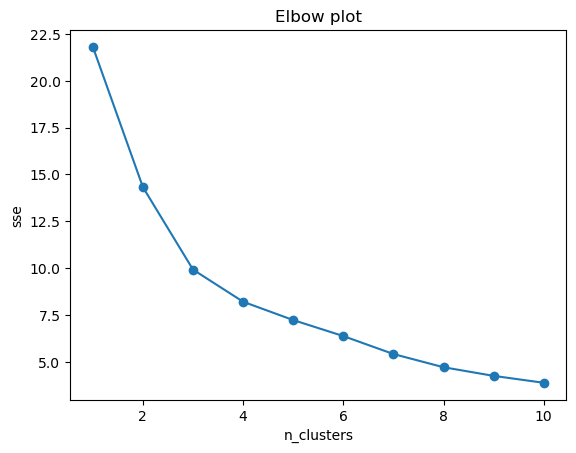

In [57]:
# create sse elbow plot 
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow plot')
plt.xlabel('n_clusters')
plt.ylabel('sse')

In [58]:
# create the final kmeans model
fin_kmeans = KMeans(n_clusters=3, n_init="auto", random_state=33)
#fin_kmean=fin_kmean.predict(norm)

fin_kmeans.fit(norm)

KMeans(n_clusters=3, n_init='auto', random_state=33)

In [59]:
fin_kmean=fin_kmeans.predict(norm)
fin_kmean

array([0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [60]:
fin_kmeans.labels_

array([0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [61]:
fin_df = pd.DataFrame(norm, columns=rfm_data.columns, index=rfm_data.index)

fin_df['cluster'] = fin_kmeans.labels_
fin_df

,pizza_id,monetary,quantity,frequency,size,cluster
0,0.000000,0.697681,0.511135,0.526640,0.00,0
1,0.011111,0.530945,0.492047,0.503646,0.25,0
2,0.022222,0.186720,0.241782,0.252944,0.50,2
3,0.033333,0.758696,1.000000,1.000000,0.50,0
4,0.044444,0.378714,0.244963,0.253505,0.50,2
...,...,...,...,...,...,...
86,0.955556,0.470964,0.277837,0.289400,0.75,1
87,0.966667,0.000000,0.000000,0.000000,1.00,1
88,0.977778,0.276718,0.211559,0.221537,0.00,1
89,0.988889,0.332150,0.321845,0.337633,0.25,1


<Axes: xlabel='cluster', ylabel='monetary'>

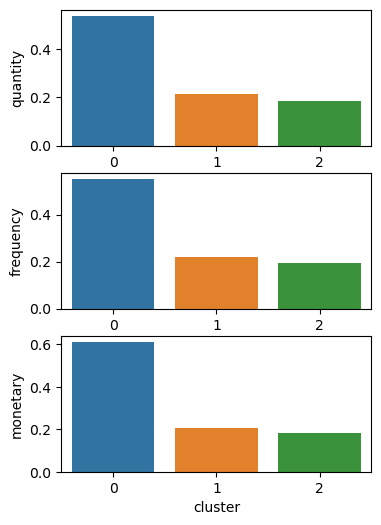

In [62]:
cluster_mean = fin_df.groupby('cluster')[['quantity', 'frequency', 'monetary']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='quantity', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='frequency', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='monetary', ax=axes[2])

In [63]:
fin_df['cluster'].value_counts()

1    38
2    33
0    20
Name: cluster, dtype: int64

In [64]:
df_merged['size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [65]:
fin_kmeans.labels_

array([0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [66]:
rfm['cluster']=fin_kmeans.labels_

In [67]:
cluster_0=rfm[rfm['cluster']==0]

In [68]:
cluster_0

,pizza_id,monetary,quantity,frequency,size,cluster
0,bbq_ckn_l,20065.25,992,967,l,0
1,bbq_ckn_m,15510.50,956,926,m,0
3,big_meat_s,21732.00,1914,1811,s,0
8,cali_ckn_l,18571.25,927,895,l,0
9,cali_ckn_m,15309.50,944,914,m,0
18,classic_dlx_m,18544.00,1181,1159,m,0
20,five_cheese_l,25141.50,1409,1359,l,0
21,four_cheese_l,22850.35,1316,1273,l,0
26,hawaiian_l,14784.00,919,896,l,0
28,hawaiian_s,10510.50,1020,1001,s,0


In [69]:
cluster_0['size'].value_counts()

l    13
m     5
s     2
Name: size, dtype: int64

In [70]:
cluster_1=rfm[rfm['cluster']==1]

In [71]:
cluster_1['size'].value_counts()

s      15
m      13
l       8
xl      1
xxl     1
Name: size, dtype: int64

In [92]:
cluster_1

,pizza_id,monetary,quantity,frequency,cluster
44,napolitana_l,11418.50,566,557,1
45,napolitana_m,6816.00,427,426,1
46,napolitana_s,5616.00,471,468,1
47,pep_msh_pep_l,6667.50,384,381,1
48,pep_msh_pep_m,5669.50,397,391,1
49,pep_msh_pep_s,6270.00,578,570,1
50,pepperoni_l,10858.00,728,712,1
52,pepperoni_s,7205.25,751,739,1
53,peppr_salami_l,14110.00,696,680,1
54,peppr_salami_m,6996.00,428,424,1


In [93]:
cluster_1['pizza_id'].unique()

array(['napolitana_l', 'napolitana_m', 'napolitana_s', 'pep_msh_pep_l',
       'pep_msh_pep_m', 'pep_msh_pep_s', 'pepperoni_l', 'pepperoni_s',
       'peppr_salami_l', 'peppr_salami_m', 'peppr_salami_s',
       'prsc_argla_l', 'prsc_argla_m', 'prsc_argla_s', 'sicilian_l',
       'sicilian_m', 'sicilian_s', 'soppressata_l', 'soppressata_m',
       'soppressata_s', 'southw_ckn_m', 'southw_ckn_s', 'spicy_ital_m',
       'spicy_ital_s', 'spin_pesto_l', 'spin_pesto_m', 'spin_pesto_s',
       'spinach_fet_l', 'spinach_fet_m', 'spinach_fet_s',
       'spinach_supr_l', 'spinach_supr_m', 'spinach_supr_s', 'thai_ckn_m',
       'thai_ckn_s', 'the_greek_l', 'the_greek_m', 'the_greek_s',
       'the_greek_xl', 'the_greek_xxl', 'veggie_veg_l', 'veggie_veg_m',
       'veggie_veg_s'], dtype=object)

In [72]:
cluster_2=rfm[rfm['cluster']==2]

In [73]:
cluster_2['size'].value_counts()

s    13
m    11
l     9
Name: size, dtype: int64

In [95]:
cluster_2

,pizza_id,monetary,quantity,frequency,cluster
2,bbq_ckn_s,6107.25,484,479,2
4,brie_carre_s,11352.00,490,480,2
5,calabrese_l,5548.50,276,274,2
6,calabrese_m,9002.50,562,554,2
7,calabrese_s,1212.75,99,99,2
10,cali_ckn_s,6285.75,499,493,2
11,ckn_alfredo_l,3880.25,188,187,2
12,ckn_alfredo_m,11674.75,703,697,2
13,ckn_alfredo_s,1224.00,96,96,2
14,ckn_pesto_l,8134.00,399,392,2


In [96]:
fin_df.shape

(91, 5)

In [97]:
rfm.shape

(91, 5)